# Introduction

Ce notebook est dédié à l'exploration des données sur les arbres de la ville de Paris.  
Le jeu de données sur les arbres de Paris est une ressource précieuse pour comprendre la distribution des arbres dans la ville et analyser diverses caractéristiques associées à ces arbres. 

### Description du Dataset

Le dataset recense les arbres de la ville de Paris, on y retrouve ceux situés dans les rues, les espaces verts et les équipements publics municipaux.  
Il inclut des informations telles que le genre, l'espèce, la circonférence, la hauteur, le stade de développement, la localisation ...

### Objectifs de l'Analyse

Cette analyse exploratoire a pour objectif de mieux comprendre la répartition des arbres à Paris.  
L'analyse aura pour but contribuer à la gestion et à l'optimisation des tournées d'arrosage de ces arbres.

## Table des matières

* [1. Exploration des données](#chapter1)
    * [Chargement des données](#section_1_1)
    * [Exploration préliminaire des colonnes](#section_1_2)


* [2. Préparation et nettoyage des données](#chapter2)
    * [Sélection des variables](#section_2_1)
    * [Analyse des valeurs aberrantes](#section_2_2)


* [ 3. Visualisation des Données](#chapter3)

# 1. <a class="anchor" id="chapter1">Exploration des données</a>

La base de données est constitué des arbres relevant de la ville de Paris.  
Cela inclut les arbres d’alignement (dans les rues), ceux des espaces verts et des équipements publics municipaux. Elle n’inclut pas les bosquets, les ensembles forestiers, les arbres du domaine privé etc.

## 1.1. <a class="anchor" id="section_1_1">Chargement des données</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
arbres_initial = pd.read_csv("data\p2-arbres-fr.csv", sep=";")

arbres_viz = arbres_initial.copy()
arbres = arbres_initial.copy()

On travaillera sur `arbres` et `arbres_viz` permettra de reprendre le jeu initial pour certaines visualisations

In [3]:
arbres_viz.shape

(200137, 18)

La base de données est constituée  de :
 - 200 137 arbres
 - pour 18 colonnes (dont un identifiant).

In [4]:
arbres_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

## 1.2. <a class="anchor" id="section_1_2">Exploration préliminaire des colonnes<a/>

Dans cette première étape de notre analyse exploratoire des données, nous entreprenons une exploration préliminaire des différentes colonnes du jeu de données sur les arbres de Paris.  
L'objectif principal est de mieux comprendre la nature des informations contenues dans le dataset.

On identifiera :
 - les colonnes pertinentes pour notre analyse 
 - la nature de chaque variable (qualitive ordinale/nominale/booléenne, quantitative).

In [5]:
relevant_columns = []
irrelevant_columns = []

ordinal_columns = []
nominal_columns = []
boolean_columns = []
quantitative_columns = []

### Identifiant

Puisque la colonne 'id' est l'identifiant unique de chaque entrée dans le jeu de données, il n'est pas nécessaire d'effectuer une analyse approfondie de ses valeurs.  
Cependant, nous effectuons une vérification pour s'assurer qu'aucun doublon n'est présent, ce qui garantit l'intégrité des données et que chaque entrée est véritablement unique

In [6]:
arbres_viz[arbres_viz.duplicated(subset='id', keep=False)]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b


**Analyse**

On ne détecte aucun doublon dans les identifiants.

In [7]:
irrelevant_columns.append('id')

### Type d'emplacement

In [8]:
arbres_viz['type_emplacement'].value_counts(dropna=False)

Arbre    200137
Name: type_emplacement, dtype: int64

**Analyse**

La colonne est inutile car remplie de la même information.

In [9]:
irrelevant_columns.append('type_emplacement')

### Domanialite 

In [10]:
arbres_viz['domanialite'].unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

In [11]:
arbres_viz['domanialite'].value_counts(dropna=False)

Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
NaN                  1
Name: domanialite, dtype: int64

**Analyse**

La colonne correspond à une donnée **qualitative nominale**.  

Les catégories et leur signification :
  - "Jardin" : Arbres situés dans les jardins.
  - "Alignement" : Arbres alignés dans les rues.
  - "DJS" : Arbres situés à proximité des équipements sportifs.
  - "DFPE" : Arbres situés à proximité des crèches.
  - "DAC" : Arbres situés à proximité des équipements culturels.
  - "DASES" : Arbres situés à proximité des services d'action sociale.
  - "CIMETIERE" : Arbres situés dans les cimetières.
  - "PERIPHERIQUE" : Arbres situés le long du périphérique.

In [12]:
relevant_columns.append('domanialite')

nominal_columns.append('domanialite')

### Arrondissement

Il s'agit de l'arrondissement de Paris, ou du département/bois (hors de la ville de Paris).

In [13]:
arbres_viz['arrondissement'].value_counts(dropna=False)

PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: arrondissement, dtype: int64

In [14]:
arbres_viz['arrondissement'].nunique()

25

**Analyse**

Cela correspond a une variable **qualitative nominale**.

Dans les arrondissements, on retrouve :
 - les 20 arrondissement parisiens
 - 3 départements d'Ile-de-France de la petite couronne 92, 93 et 94
 - le bois de Vincennes et le bois de Boulogne 

In [15]:
relevant_columns.append('arrondissement')

nominal_columns.append('arrondissement')

### Complément d'adresse

In [16]:
arbres_viz['complement_addresse'].nunique()

3795

In [17]:
arbres_viz['complement_addresse'].value_counts()

SN°           557
1             552
2             547
3             498
4             464
             ... 
F 10-12         1
F 99            1
93 Flandre      1
F 97            1
40face          1
Name: complement_addresse, Length: 3795, dtype: int64

**Analyse**

On retrouve des numéros sans adresses précises, la donnée n'est pas pertinente.

In [18]:
irrelevant_columns.append('complement_addresse')

### Numéro

In [19]:
arbres_viz['numero'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: numero, dtype: float64

**Analyse**

La colonne est entièrement vide, la donnée n'est pas pertinente.

In [20]:
irrelevant_columns.append('numero')

### Lieu

Cette colonne renseigne sur l'endroit où se trouve l'arbre.  

In [21]:
arbres_viz['lieu'].nunique()

6921

In [22]:
arbres_viz['lieu'].value_counts()

PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE                       2995
PARC DES BUTTES CHAUMONT                                          2331
PARC ANDRE CITROEN                                                2095
PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD DES FRERES VOISIN    1478
INSEP / AVENUE DU TREMBLAY                                        1293
                                                                  ... 
CIMETIERE ST VINCENT / DIV 5                                         1
ROUTE DU LAC A BAGATELLE                                             1
ROUTE DE LA PORTE SAINT-JAMES                                        1
PENTE DE GRAVELLE - AVENUE DE GRAVELLE / ROUTE NOUVELLE              1
CIMETIERE DE PANTIN / DIV 66                                         1
Name: lieu, Length: 6921, dtype: int64

**Analyse**

On constate qu'il s'agit d'une variable qualitative nominale.  
La variables est très morcellée. Elle ne sera pas très intéressante dans le cadre de notre analyse.

In [23]:
irrelevant_columns.append('lieu')

### Identifiant d'emplacement

In [24]:
arbres_viz['id_emplacement'].nunique()

69040

In [25]:
arbres_viz['id_emplacement'].value_counts()

101001          1324
101002          1241
101003          1128
202001          1032
101004          1020
                ... 
A15100096004       1
A15100096003       1
A15100096002       1
A15100096001       1
720170155          1
Name: id_emplacement, Length: 69040, dtype: int64

**Analyse**

Il s'agit d'une variable qualitative nominale.

On note beaucoup d'emplacements et que l'identifiant n'est pas interprétable sans l'association à un lieu.  
La variable n'est pas pertinente dans l'analyse.

In [26]:
irrelevant_columns.append('id_emplacement')

### Libellé français

Comme son nom l'indique, la variable indique le nom français de l'arbre.

In [27]:
arbres_viz['libelle_francais'].nunique()

192

In [28]:
arbres_viz['libelle_francais'].value_counts().head(15)

Platane                 42508
Marronnier              25207
Tilleul                 21305
Erable                  18389
Sophora                 11797
Frêne                    5171
Pin                      4844
Micocoulier              4201
Chêne                    3866
Cerisier à fleurs        3767
Charme                   3471
Poirier à fleurs         3409
Noisetier de Byzance     3372
Peuplier                 3314
Robinier                 2305
Name: libelle_francais, dtype: int64

**Analyse**

Variable qualitative nominale .

On dénombre 192 nom d'arbres. Il y a des catégories dominantes et un grand nombre de catégorié très rares.

In [29]:
relevant_columns.append('libelle_francais')

nominal_columns.append('libelle_francais')

### Genre

In [30]:
arbres_viz['genre'].nunique()

175

In [31]:
arbres_viz['genre'].value_counts()

Platanus        42591
Aesculus        25341
Tilia           21550
Acer            18471
Sophora         11830
                ...  
Sycopsis            1
Enkianthus          1
Euscaphis           1
Phyllanthus         1
Washingtonia        1
Name: genre, Length: 175, dtype: int64

**Analyse**

Variable qualitative nominale.  
175 genres sont présents, on reconnait des catégories proches du libellé français.

In [32]:
relevant_columns.append('genre')

nominal_columns.append('genre')

### Espèce

In [33]:
arbres_viz['espece'].nunique()

539

In [34]:
arbres_viz['espece'].value_counts()

x hispanica                  36409
hippocastanum                20039
japonica                     11822
n. sp.                        9063
tomentosa                     8962
                             ...  
polycarpa                        1
x gondouinii                     1
lusitanica subsp.azorica         1
oliveri                          1
delavayi subsp. potaninii        1
Name: espece, Length: 539, dtype: int64

**Analyse**  

Variable qualitative nominale.  
Une variable très détaillée avec 539 catégories, on retrouve des noms plus complexes à identifier avec les termes latins.

In [35]:
relevant_columns.append('espece')
nominal_columns.append('espece')

### Variété

In [36]:
arbres_viz['variete'].nunique()

436

In [37]:
arbres_viz['variete'].value_counts()

Baumannii'             4538
Briotii'               2827
Euchlora'              2756
Chanticleer'           2595
Fastigiata'            2483
                       ... 
Conspicua'                1
Concordia'                1
Kojou-no-mai'             1
Nizetii'                  1
Grosse Pomme Noire'       1
Name: variete, Length: 436, dtype: int64

**Analyse**  

Variable qualitative nominale.  
De nouveau une variable très détaillée avec 436 catégories et des noms variés mais peu commun.

In [38]:
relevant_columns.append('variete')
nominal_columns.append('variete')

### Circonférence

In [39]:
arbres_viz['circonference_cm'].describe()

count    200137.000000
mean         83.380479
std         673.190213
min           0.000000
25%          30.000000
50%          70.000000
75%         115.000000
max      250255.000000
Name: circonference_cm, dtype: float64

**Analyse**

Il s'agit d'une variable quantitative.

On peut déjà identifier des données erronées avec des unités de mesures inexactes car disproportionnées.  

In [40]:
relevant_columns.append('circonference_cm')
quantitative_columns.append('circonference_cm')

### Hauteur

In [41]:
arbres_viz['hauteur_m'].describe()

count    200137.000000
mean         13.110509
std        1971.217387
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: hauteur_m, dtype: float64

**Analyse**

Il s'agit d'une variable quantitative.  
Même constat que pour la circonférence sur des données disproportionnées, avec de potentielles erreurs dans unité de mesure.

In [42]:
relevant_columns.append('hauteur_m')
quantitative_columns.append('hauteur_m')

### Stade de développement

La variable donne donc le stade de développement de l'arbre. La documentation détaille les stades :
 - J pour Jeune,
 - JA pour Jeune,
 - A pour Adulte,
 - M pour Mature.

In [43]:
arbres_viz['stade_developpement'].value_counts(dropna=False, normalize=True)

NaN    0.335795
A      0.321969
JA     0.177099
J      0.134593
M      0.030544
Name: stade_developpement, dtype: float64

**Analyse**

Il s'agit d'une variable qualitative ordinale.  
Un grand nombre de valeurs sont absentes, de l'ordre 33%.

In [44]:
relevant_columns.append('stade_developpement')
ordinal_columns.append('stade_developpement')

### Remarquable

La variable indique si l'arbre est classé comme remarquable ou non.

In [45]:
arbres_viz['remarquable'].value_counts(dropna=False)

0.0    136855
NaN     63098
1.0       184
Name: remarquable, dtype: int64

In [46]:
arbres_viz['remarquable'].value_counts(dropna=False, normalize=True)

0.0    0.683807
NaN    0.315274
1.0    0.000919
Name: remarquable, dtype: float64

**Analyse**  

Il s'agit d'une variable qualitative binaire.  
Un grand nombre de valeurs sont absentes, de l'ordre 31%. Très peu de d'arbres sont classés remarquables, de l'ordre de 1 sur 10 000.

In [47]:
relevant_columns.append('remarquable')
boolean_columns.append('remarquable')

### Latitude et Longitude

Les colonnes 'geo_point_2d_a' et 'geo_point_2d_b' correspondent aux coordonnées géographiques, la latitute et la longitude respectivement.

In [48]:
arbres_viz['geo_point_2d_a'].describe()

count    200137.000000
mean         48.854491
std           0.030234
min          48.742290
25%          48.835021
50%          48.854162
75%          48.876447
max          48.911485
Name: geo_point_2d_a, dtype: float64

In [49]:
arbres_viz['geo_point_2d_b'].describe()

count    200137.000000
mean          2.348208
std           0.051220
min           2.210241
25%           2.307530
50%           2.351095
75%           2.386838
max           2.469759
Name: geo_point_2d_b, dtype: float64

**Analyse**

Les deux données sont des variables quantitatives.  
Les données sont consistantes, elles sont proches des coordonnées de Paris.

In [50]:
relevant_columns.append('geo_point_2d_a')
quantitative_columns.append('geo_point_2d_a')

In [51]:
relevant_columns.append('geo_point_2d_b')
quantitative_columns.append('geo_point_2d_b')

## 1.3. <a class="anchor" id="section_1_3">Sélection des variables<a/>

### 1.3.1. Contrôles

Vérifions que nous n'avons oublié aucune colonne. Pour cela, il suffit de vérifier :
 - que les set des deux listes `irrelevant_columns` et `relevant_columns` réunies correspondent aux colonnes du dataset.
 - qu'aucune colonne est dans les deux set.

In [52]:
set(irrelevant_columns + relevant_columns) == set(arbres.columns)

True

In [53]:
set(irrelevant_columns).intersection(set(relevant_columns))

set()

On a bien deux ensembles disjoints qui forment l'ensemble des colonnes initiales.

In [54]:
irrelevant_columns

['id',
 'type_emplacement',
 'complement_addresse',
 'numero',
 'lieu',
 'id_emplacement']

### 1.3.2. Colonnes non pertinentes

Les colonnes peu ou pas pertinentes sont :  
- 'id'
- 'type_emplacement'
- 'complement_addresse'
- 'numero'
- 'lieu'
- 'id_emplacement' 

In [55]:
relevant_columns

['domanialite',
 'arrondissement',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'circonference_cm',
 'hauteur_m',
 'stade_developpement',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

### 1.3.3. Colonnes redondantes

Parmi les colonnes pertinentes, on retrouve plusieurs colonnes redondantes :  
- 'libelle_francais'
- 'genre'
- 'espece'
- 'variete' 

On conserve 'libelle_francais' et on enlève donc les autres colonnes de l'analyse.

In [56]:
for deleted_column in ['genre', 'espece', 'variete']:
    if deleted_column in relevant_columns:
        relevant_columns.remove(deleted_column)

Bilan : Les colonnes supprimées sont donc :  
- 'id'
- 'type_emplacement'
- 'complement_addresse'
- 'numero'
- 'lieu'
- 'id_emplacement'
- 'genre'
- 'espece'
- 'variete' 

### 1.3.4. Construction du dataset

In [57]:
arbres = arbres[relevant_columns]
arbres_viz = arbres[relevant_columns]

In [58]:
arbres_viz

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,Marronnier,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,If,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,If,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,Erable,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,Arbre à miel,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...
200132,Jardin,BOIS DE VINCENNES,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,Jardin,BOIS DE VINCENNES,Arbre aux mouchoirs,0,0,NaN,0.0,48.823254,2.457935
200134,Jardin,BOIS DE VINCENNES,Peuplier,0,0,NaN,0.0,48.822907,2.457970
200135,Jardin,BOIS DE VINCENNES,Chêne,0,0,NaN,0.0,48.822522,2.455956


### Simplifications

In [59]:
arbres = arbres.rename(columns={
    'libelle_francais': 'espece',
    'stade_developpement': 'stade',
    'geo_point_2d_a': 'latitude',
    'geo_point_2d_b': 'longitude'})

arbres_viz = arbres_viz.rename(columns={
    'libelle_francais': 'espece',
    'stade_developpement': 'stade',
    'geo_point_2d_a': 'latitude',
    'geo_point_2d_b': 'longitude'})


In [60]:
arbres = arbres.replace(
    {
        'PARIS 20E ARRDT': 20,
        'PARIS 19E ARRDT': 19,
        'PARIS 18E ARRDT': 18,
        'PARIS 17E ARRDT': 17,
        'PARIS 16E ARRDT': 16,
        'PARIS 15E ARRDT': 15,
        'PARIS 14E ARRDT': 14,
        'PARIS 13E ARRDT': 13,
        'PARIS 12E ARRDT': 12,
        'PARIS 11E ARRDT': 11,
        'PARIS 10E ARRDT': 10,
        'PARIS 9E ARRDT': 9,
        'PARIS 8E ARRDT': 8,
        'PARIS 7E ARRDT': 7,
        'PARIS 6E ARRDT': 6,
        'PARIS 5E ARRDT': 5,
        'PARIS 4E ARRDT': 4,
        'PARIS 3E ARRDT': 3,
        'PARIS 2E ARRDT': 2,
        'PARIS 1ER ARRDT': 1,
        'VAL-DE-MARNE': 94,
        'SEINE-SAINT-DENIS': 93,
        'HAUTS-DE-SEINE': 92,
        "DASCO": "Ecoles",
        "DJS": "Equipements sportifs",
        "DFPE": "Crèches",
        "DAC": "Equipements culturels",
        "DASES": "Action sociale",
    }
)

arbres_viz = arbres_viz.replace(
    {
        'PARIS 20E ARRDT': 20,
        'PARIS 19E ARRDT': 19,
        'PARIS 18E ARRDT': 18,
        'PARIS 17E ARRDT': 17,
        'PARIS 16E ARRDT': 16,
        'PARIS 15E ARRDT': 15,
        'PARIS 14E ARRDT': 14,
        'PARIS 13E ARRDT': 13,
        'PARIS 12E ARRDT': 12,
        'PARIS 11E ARRDT': 11,
        'PARIS 10E ARRDT': 10,
        'PARIS 9E ARRDT': 9,
        'PARIS 8E ARRDT': 8,
        'PARIS 7E ARRDT': 7,
        'PARIS 6E ARRDT': 6,
        'PARIS 5E ARRDT': 5,
        'PARIS 4E ARRDT': 4,
        'PARIS 3E ARRDT': 3,
        'PARIS 2E ARRDT': 2,
        'PARIS 1ER ARRDT': 1,
        'VAL-DE-MARNE': 94,
        'SEINE-SAINT-DENIS': 93,
        'HAUTS-DE-SEINE': 92,
        "DASCO": "Ecoles",
        "DJS": "Equipements sportifs",
        "DFPE": "Crèches",
        "DAC": "Equipements culturels",
        "DASES": "Action sociale",
    }
)

# 2. <a class="anchor" id="chapter_2">Préparation et nettoyage des données<a/>

## 2.1. <a class="anchor" id="section_2_1">Gestion des doublons<a/>

Pour repérer des doublons on regarde les arbres qui ont les même **coordonnées géographiques**.

In [61]:
duplicated_coord = arbres[arbres.duplicated(subset=['latitude', 'longitude'], keep=False)]

In [62]:
duplicated_groups = duplicated_coord.groupby(['latitude', 'longitude'])

In [63]:
indices_groups = []
for coord, group in duplicated_groups:
    indices_groups.append(group.index.tolist())

Regardons deux à deux les doublons

In [64]:
for indices in indices_groups:
    for j in range(len(arbres.iloc[indices[0], :])):
        print(str(arbres.iloc[indices[0], j]) + ' ' * (30 - len(str(arbres.iloc[indices[0], j]))) + '| ' + str(arbres.iloc[indices[1], j]))
    print("-" * 60)

Alignement                    | Alignement
BOIS DE VINCENNES             | BOIS DE VINCENNES
Tilleul                       | Tilleul
0                             | 0
0                             | 0
nan                           | nan
0.0                           | 0.0
48.8299116435                 | 48.8299116435
2.4396646786                  | 2.4396646786
------------------------------------------------------------
Jardin                        | Jardin
BOIS DE VINCENNES             | BOIS DE VINCENNES
Peuplier                      | Peuplier
0                             | 100
0                             | 22
nan                           | A
0.0                           | 0.0
48.8364163184                 | 48.8364163184
2.4462772713                  | 2.4462772713
------------------------------------------------------------
Jardin                        | Jardin
BOIS DE VINCENNES             | BOIS DE VINCENNES
Hêtre                         | Pommier à fleurs
75            

**Choix sur les potentiels doublons**

  - 10100, 10099   : Les lignes se suivent et contiennent les mêmes informations : suppression de la ligne 10 099.
  - 76385, 12794   : Lignes concordantes, deux différences  : suppression de la ligne 76 385.
  - 76386, 12795   :                ,,                      : suppression de la ligne 76 386.
  - 76387, 12796   :                ,,                      : suppression de la ligne 76 387.
  - 185480, 185479 : Les lignes se suivent et contiennent les mêmes informations : suppression de la ligne 185 480.
  - 188304, 188269 : Les lignes sont relativement proches   : suppression de la ligne 188 304
  - 189134, 189133 : Les lignes se suivent et concordent : suppression de la ligne la moins détailée : 189 133.
  - 193017, 193007 : Les données diffèrent. Aucune suppression.
  - 193577, 188329 : Les données diffèrent. Aucune suppression.
  - 193586, 188426 : Les lignes concordent. Suppression de la ligne la moins détailée : 193 586.
  - 193587, 188427 :                ,,      Suppression de la ligne la moins détailée : 193 587.

Bilan : 

9 suppressions : 10 099, 76 385, 76 386, 76 387, 185 480, 188 304, 189 133, 193 586, 193 587.


In [65]:
deleted_indices = [10099, 76385, 76386, 76387, 185480, 188304, 189133, 193586, 193587]

In [66]:
#######################################################
arbres = arbres.drop(deleted_indices)
arbres = arbres.reset_index(drop=True)

arbres_viz = arbres_viz.drop(deleted_indices)
arbres_viz = arbres_viz.reset_index(drop=True)
#######################################################

## 2.2. <a class="anchor" id="section_2_2">Gestion des valeurs manquantes<a/>

### 2.2.1. Identification des valeurs manquantes

Les valeurs de hauteur nulle et de circonférence nulle peuvent être considérées comme des valeurs manquantes.

In [67]:
#######################################################

arbres['circonference_cm'] = np.where(arbres['circonference_cm'] == 0, np.NaN, arbres['circonference_cm'])
arbres['hauteur_m'] = np.where(arbres['hauteur_m'] == 0, np.NaN, arbres['hauteur_m'])

arbres_viz['circonference_cm'] = np.where(arbres_viz['circonference_cm'] == 0, np.NaN, arbres_viz['circonference_cm'])
arbres_viz['hauteur_m'] = np.where(arbres_viz['hauteur_m'] == 0, np.NaN, arbres_viz['hauteur_m'])

#######################################################

Bilan

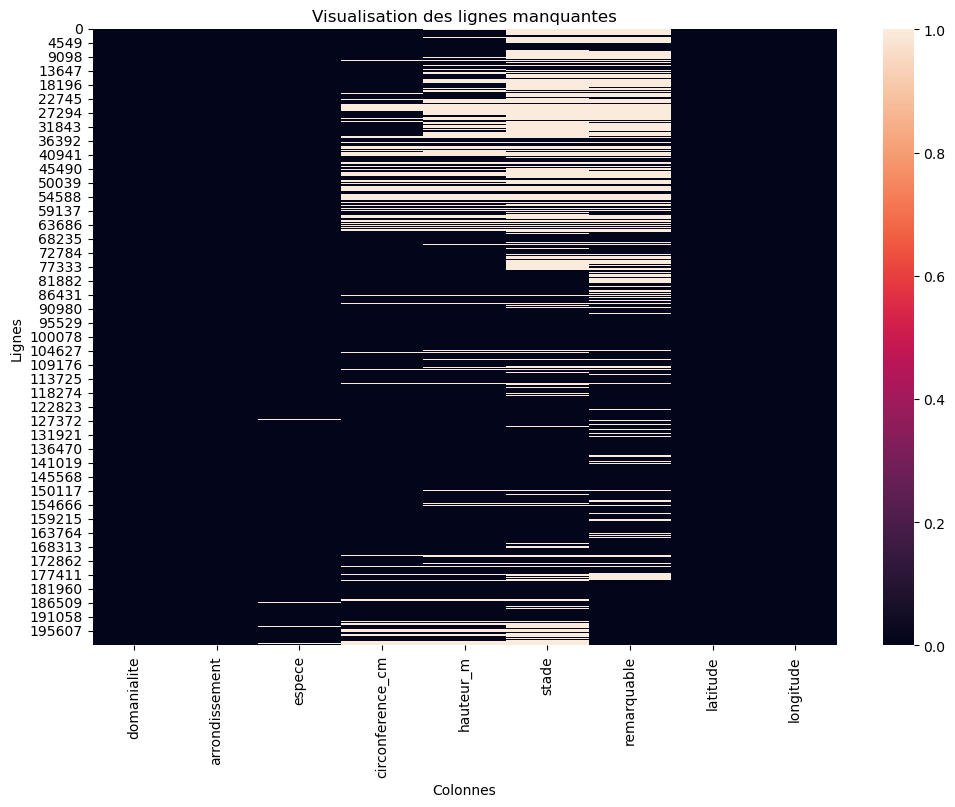

In [68]:
fig = plt.figure(figsize=(12,8))
ax = sns.heatmap(arbres.isna())
ax.set_xlabel("Colonnes")
ax.set_ylabel("Lignes")
ax.set_title('Visualisation des lignes manquantes')
plt.show()

In [69]:
arbres.isna().sum()

domanialite             1
arrondissement          0
espece               1497
circonference_cm    25862
hauteur_m           39214
stade               67197
remarquable         63094
latitude                0
longitude               0
dtype: int64

On remarque 4 colonnes avec des valeurs NaN :
 - Domanialité
 - libellé français
 - ciconférence
 - hauteur
 - stade de développement 
 - arbre remarquable
 
 Regardons chaque colonne une à une.

### 2.2.2. Situations simples

On traite d'abord les colonnes 'domanialite', 'libelle_francais' et 'remarquable' dont le traitement choisi sera plus simple et appliqué immédiatement.

#### Domanialité

Une seule valeur est manquante, on la supprime.

In [70]:
#######################################################
arbres.dropna(subset=['domanialite'], inplace=True)
arbres_viz.dropna(subset=['domanialite'], inplace=True)
#######################################################

#### Espèce

On créé un intitulé inconnu. Il est difficile de deviner le type d'arbre avec d'autres colonnes.

In [71]:
#######################################################
arbres['espece'].fillna("Inconnu", inplace=True)
arbres_viz['espece'].fillna("Inconnu", inplace=True)
#######################################################

#### Arbre remarquable

Les arbres remarquables sont plus rares, de plus, on peut supposer que s'ils le sont, l'information a été renseignée plus facilement.  
On va donc faire l'hypothèse que les arbres sans information sur cette colonne ne sont pas remarquables (valeur 0 pour Faux).

In [72]:
#######################################################
arbres['remarquable'].fillna(0, inplace=True)
arbres_viz['remarquable'].fillna(0, inplace=True)
#######################################################

In [73]:
arbres.isna().sum()

domanialite             0
arrondissement          0
espece                  0
circonference_cm    25862
hauteur_m           39214
stade               67197
remarquable             0
latitude                0
longitude               0
dtype: int64

### 2.2.3. Autres situations

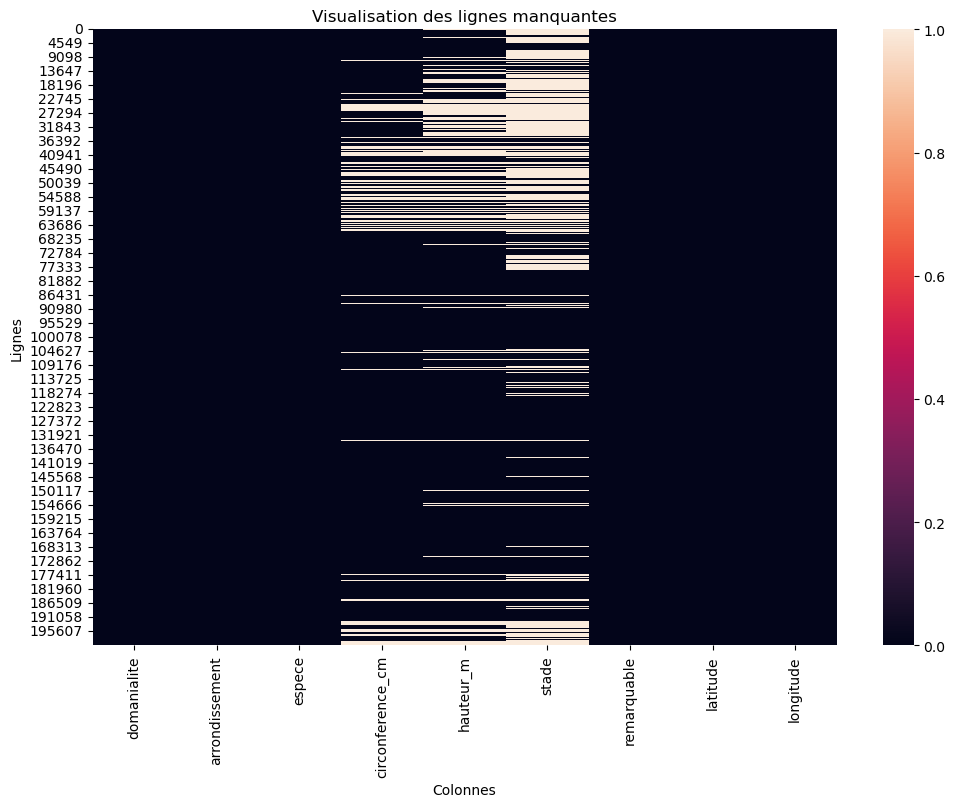

In [74]:
fig = plt.figure(figsize=(12,8))
ax = sns.heatmap(arbres.isna())
ax.set_xlabel("Colonnes")
ax.set_ylabel("Lignes")
ax.set_title('Visualisation des lignes manquantes')
plt.show()

On peut remarquer que lorsque la valeur de circonférence est manquante, généralement la hauteur et le stade le sont aussi.  
De même lorsque la hauteur est manquante, le stade de développement l'est aussi.  
L'inverse n'est pas vrai et d'ailleurs le stade de développement est le moins renseigné, puis la hauteur.

La forte corrélation entre l'absence de ces valeurs ne permet pas de bien les reconstruire les unes avec les autres.

On va donc opter pour une méthode simple :
 - remplacer les valeurs manquantes du stade par Adulte (le mode le plus fréquent)
 - remplacer les valeurs manquantes de circonférence et de hauteur par la médiane (moins sujette aux valeurs aberrantes)

On créé des colonnes pour noter l'absence et on pourra revenir sur le traitement des valeurs manquantes, après me traitement des valeurs aberrantes.

In [75]:
# Créer une colonne pour indiquer si la valeur est absente

arbres['stade_absent'] = np.where(arbres['stade'].isna(), 1, 0)

# Afficher le DataFrame avec les nouvelles colonnes
arbres.head()

,domanialite,arrondissement,espece,circonference_cm,hauteur_m,stade,remarquable,latitude,longitude,stade_absent
0,Jardin,7,Marronnier,20.0,5.0,NaN,0.0,48.857620,2.320962,1
1,Jardin,7,If,65.0,8.0,A,0.0,48.857656,2.321031,0
2,Jardin,7,If,90.0,10.0,A,0.0,48.857705,2.321061,0
3,Jardin,7,Erable,60.0,8.0,A,0.0,48.857722,2.321006,0
4,Jardin,17,Arbre à miel,38.0,NaN,NaN,0.0,48.890435,2.315289,1


#### Stade de développement

In [76]:
arbres['stade'].value_counts(dropna=False, normalize=True)

NaN    0.335772
A      0.321981
JA     0.177103
J      0.134600
M      0.030546
Name: stade, dtype: float64

In [77]:
arbres['stade'].value_counts(dropna=False)

NaN    67197
A      64437
JA     35443
J      26937
M       6113
Name: stade, dtype: int64

Pour le stade de développement, le nombre de valeurs représente près de 33% et il est plus complexe de décider du traitement

#### Option d'imputation plus complexe

On va utiliser KNNImputer qui permet de chercher les plus proches voisins selon d'autres caractéristiques et de calculer le stade de développement en observant ces proches voisins.
Pour opérer deux caractéristiques apparaissent intéressante pour déduire le stade de développement, la circonférence et la hauteur.

Il nous faut aussi encoder le stade pour pouvoir utiliser KNNImputer.

## 2.3. <a class="anchor" id="section_2_3">Valeurs aberrantes<a/>

Dans les variables catégorielles (arbres remarquables compris), pas de valeurs aberrantes dans le sens où elles sont dans l'une des catégories ou traitées.  
Il reste donc les variables : circonférence, hauteur et les coordonnées géographiques.

### 2.3.1. Hauteur et circonférence

En se basant sur ce [site](https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris) on peut déterminer des valeurs maximales de hauteur et de circonférence d'un arbre. On retrouve donc un arbre de 35 mètres et un arbre de 7 mètres de circonférence dans les arbres de Paris.
On fixe une marge sur les valeurs données avec :
 - une circonférence maximale 8 m = 800 cm
 - une hauteur maximale de 40 m

In [79]:
HAUTEUR_MAX = 40
CIRCONFERENCE_MAX = 800

In [80]:
print(f'On compte {arbres[arbres.hauteur_m>HAUTEUR_MAX].shape[0]} arbres de plus de {HAUTEUR_MAX} mètres.')
print(f"On compte {arbres[arbres.circonference_cm>CIRCONFERENCE_MAX].shape[0]} d'une circonférence de plus de {CIRCONFERENCE_MAX} centimètres")

On compte 483 arbres de plus de 40 mètres.
On compte 77 d'une circonférence de plus de 800 centimètres


Leur nombre n'est pas très élevé, on peut remplacer leur valeur par des valeurs manquantes.

In [82]:
#######################################################

# Créer une colonne pour indiquer les valeurs aberrantes
arbres['circonference_aberrante'] = np.where(arbres['circonference_cm'] > CIRCONFERENCE_MAX, 1, 0)
arbres['hauteur_aberrante'] = np.where(arbres['hauteur_m'] > HAUTEUR_MAX, 1, 0)

# Remplacer les valeurs aberrantes par NaN
arbres.loc[arbres['circonference_aberrante'] == 1, 'circonference_cm'] = np.NaN
arbres.loc[arbres['hauteur_aberrante'] == 1, 'hauteur_m'] = np.NaN


arbres_viz['circonference_aberrante'] = np.where(arbres_viz['circonference_cm'] > CIRCONFERENCE_MAX, 1, 0)
arbres_viz['hauteur_aberrante'] = np.where(arbres_viz['hauteur_m'] > HAUTEUR_MAX, 1, 0)
arbres_viz.loc[arbres_viz['circonference_aberrante'] == 1, 'circonference_cm'] = np.NaN
arbres_viz.loc[arbres_viz['hauteur_aberrante'] == 1, 'hauteur_m'] = np.NaN
#######################################################
# Les colonnes "absence"
arbres['circonference_absent'] = np.where(arbres['circonference_cm'].isna(), 1, 0)
arbres['hauteur_absent'] = np.where(arbres['hauteur_m'].isna(), 1, 0)

# Afficher le DataFrame mis à jour
arbres.head()

,domanialite,arrondissement,espece,circonference_cm,hauteur_m,stade,remarquable,latitude,longitude,stade_absent,circonference_aberrante,hauteur_aberrante,circonference_absent,hauteur_absent
0,Jardin,7,Marronnier,20.0,5.0,NaN,0.0,48.857620,2.320962,1,0,0,0,0
1,Jardin,7,If,65.0,8.0,A,0.0,48.857656,2.321031,0,0,0,0,0
2,Jardin,7,If,90.0,10.0,A,0.0,48.857705,2.321061,0,0,0,0,0
3,Jardin,7,Erable,60.0,8.0,A,0.0,48.857722,2.321006,0,0,0,0,0
4,Jardin,17,Arbre à miel,38.0,NaN,NaN,0.0,48.890435,2.315289,1,0,0,0,1


Les boxplot devraient êtrep plus lisible désormais

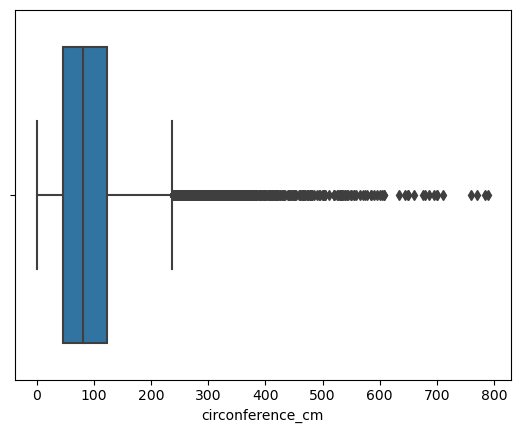

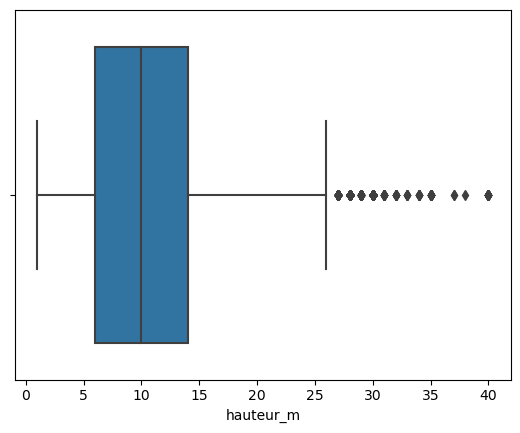

In [83]:
sns.boxplot(x=arbres['circonference_cm'])
plt.show()

sns.boxplot(x=arbres['hauteur_m'])
plt.show()

In [84]:
arbres['circonference_cm'].fillna(arbres['circonference_cm'].median(), inplace=True)

arbres['hauteur_m'].fillna(arbres['hauteur_m'].median(), inplace=True)

arbres['stade'].fillna(arbres['stade'].mode()[0], inplace=True)

In [85]:
arbres.isna().sum()

domanialite                0
arrondissement             0
espece                     0
circonference_cm           0
hauteur_m                  0
stade                      0
remarquable                0
latitude                   0
longitude                  0
stade_absent               0
circonference_aberrante    0
hauteur_aberrante          0
circonference_absent       0
hauteur_absent             0
dtype: int64

# 3. <a class="anchor" id="chapter_3">Visualisation des Données<a/>

In [86]:
arbres_viz.columns

Index(['domanialite', 'arrondissement', 'espece', 'circonference_cm',
       'hauteur_m', 'stade', 'remarquable', 'latitude', 'longitude',
       'circonference_aberrante', 'hauteur_aberrante'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_16444\1738916302.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_espece=arbres_viz.espece.value_counts().head(9).append(pd.Series([others], index=["Autres"]))


<Axes: title={'center': 'Figure 1 : Distribution des espèces'}>

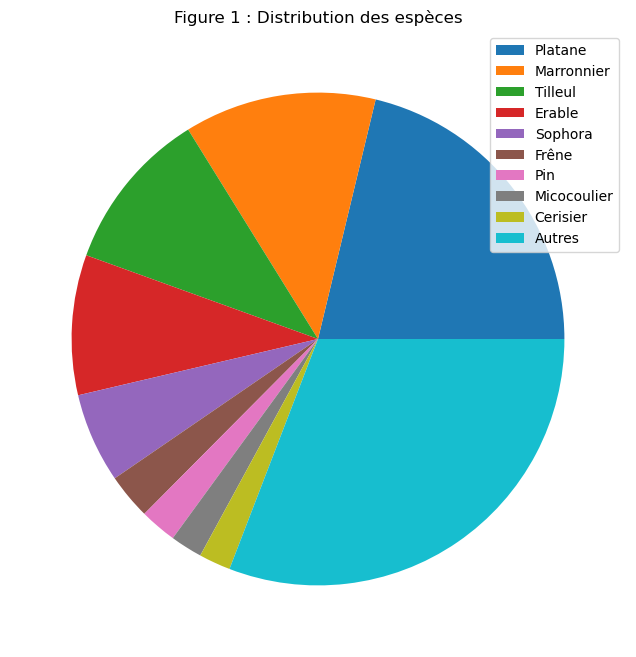

In [88]:
arbres_viz['espece'] = arbres_viz['espece'].apply(lambda x: x.split()[0])
others = arbres_viz.espece.value_counts().sum() - arbres_viz.espece.value_counts().head(9).sum()
top_espece=arbres_viz.espece.value_counts().head(9).append(pd.Series([others], index=["Autres"]))
top_espece.plot.pie(legend=True, labels=None, figsize=(8,8), title='Figure 1 : Distribution des espèces')

<Axes: title={'center': 'Figure 2 : Distribution des domaines'}, ylabel='domanialite'>

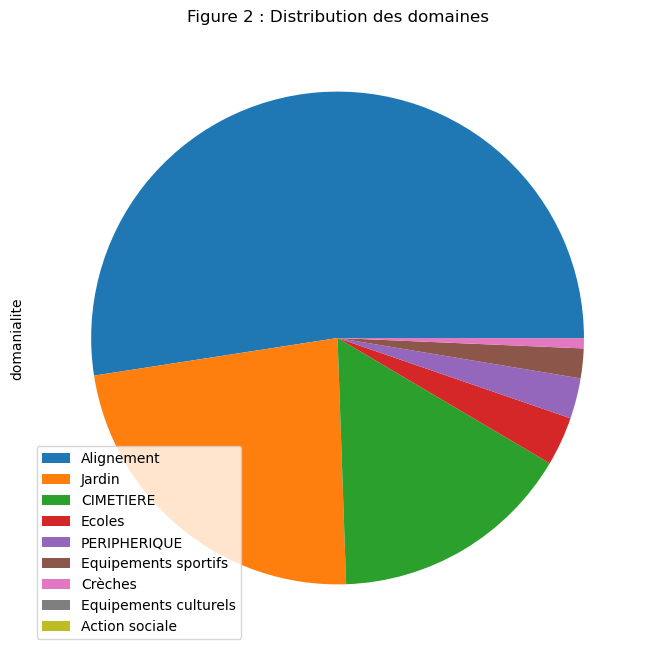

In [89]:
arbres_viz.domanialite.value_counts().plot.pie(legend=True, labels=None, figsize=(8,8), title='Figure 2 : Distribution des domaines')

Text(0, 0.5, "Nombre d'arbres")

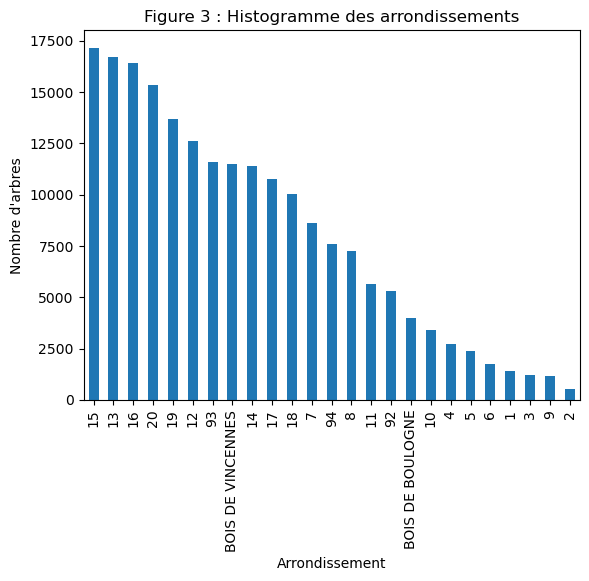

In [90]:
arbres_viz.arrondissement.value_counts().plot(kind='bar')
plt.title('Figure 3 : Histogramme des arrondissements')
plt.xlabel('Arrondissement')
plt.ylabel("Nombre d'arbres")

In [93]:
arbres_viz.circonference_cm.describe()

count    174188.000000
mean         91.464085
std          58.962953
min           1.000000
25%          45.000000
50%          80.000000
75%         122.000000
max         790.000000
Name: circonference_cm, dtype: float64

In [97]:
arbres_viz['circonference_cm']

0         20.0
1         65.0
2         90.0
3         60.0
4         38.0
          ... 
200123     NaN
200124     NaN
200125     NaN
200126     NaN
200127     NaN
Name: circonference_cm, Length: 200127, dtype: float64

In [94]:
def determine_maxvalue(serie):
    q75, q25 = np.percentile(serie, [75 ,25])
    iqr = (q75 - q25) * 1.5
    max = q75 + iqr
    return max

In [98]:
max_circonference = determine_maxvalue(arbres_viz['circonference_cm'].dropna())
max_circonference

237.5

Text(0.5, 1.0, 'Figure 4 : Diagramme en boîte circonférences')

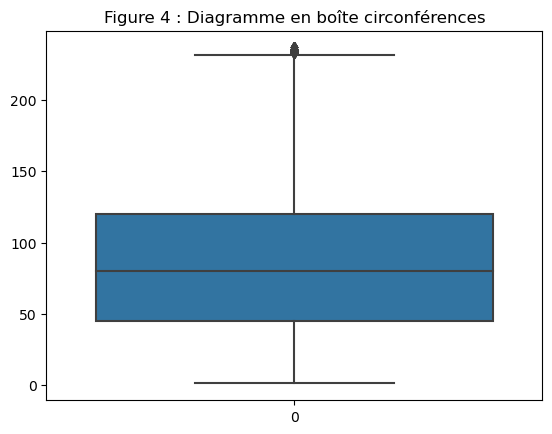

In [99]:
sns.boxplot(arbres_viz['circonference_cm'][arbres_viz['circonference_cm']<max_circonference]).set_title("Figure 4 : Diagramme en boîte circonférences")

In [100]:
arbres_viz['circonference_cm'].describe()

count    174188.000000
mean         91.464085
std          58.962953
min           1.000000
25%          45.000000
50%          80.000000
75%         122.000000
max         790.000000
Name: circonference_cm, dtype: float64

Text(0, 0.5, "Nombre d'arbres")

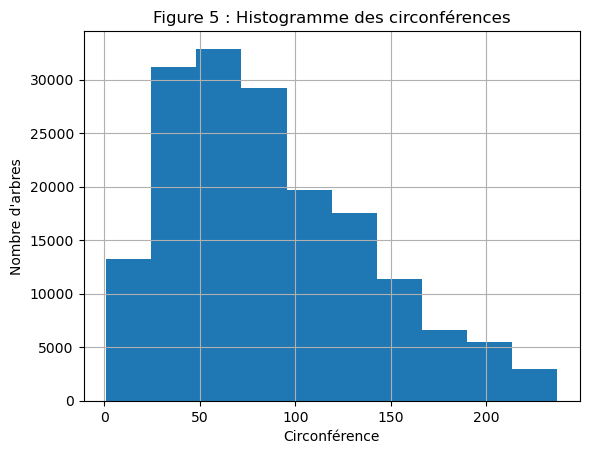

In [101]:
arbres_viz['circonference_cm'][arbres_viz['circonference_cm']<max_circonference].hist()
plt.title("Figure 5 : Histogramme des circonférences")
plt.xlabel("Circonférence")
plt.ylabel("Nombre d'arbres")

Text(0.5, 1.0, 'Figure 6 : Diagramme en boîte hauteurs')

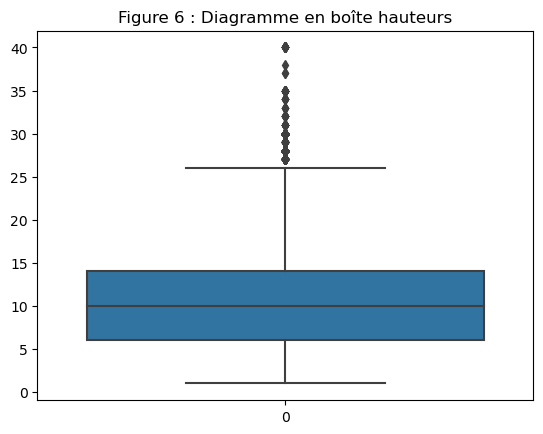

In [102]:
sns.boxplot(arbres_viz['hauteur_m']).set_title("Figure 6 : Diagramme en boîte hauteurs")

Text(0, 0.5, "Nombre d'arbres")

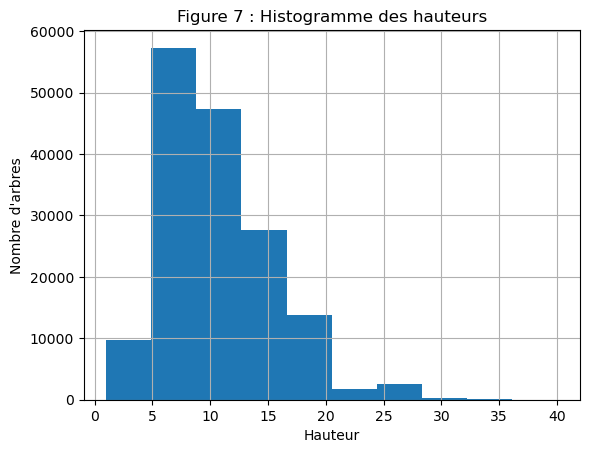

In [103]:
arbres_viz['hauteur_m'].hist()
plt.title("Figure 7 : Histogramme des hauteurs")
plt.xlabel("Hauteur")
plt.ylabel("Nombre d'arbres")

Text(0.5, 1.0, 'Figure 8 : Distribution des stades de dévelopemment')

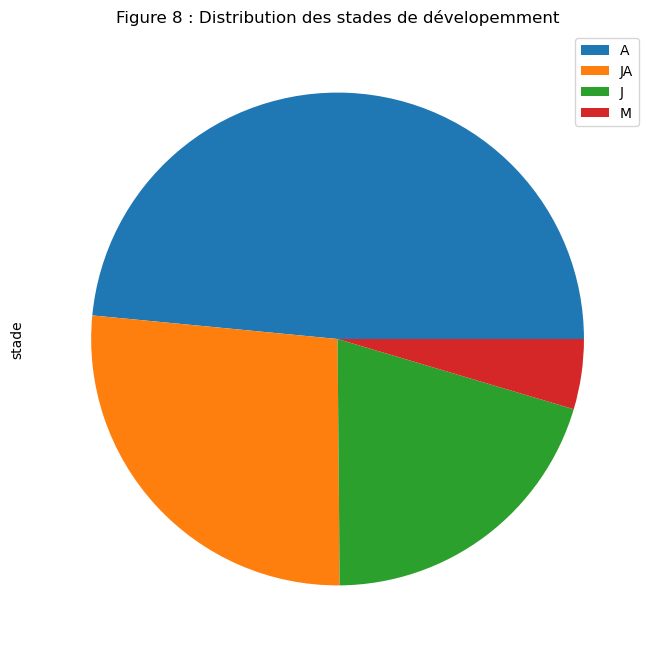

In [104]:
arbres_viz['stade'].value_counts().plot.pie(legend=True, labels=None, figsize=(8,8))
plt.title("Figure 8 : Distribution des stades de dévelopemment")

Text(0.5, 1.0, 'Figure 9 : Distribution des espèces dans les arbres remarquables')

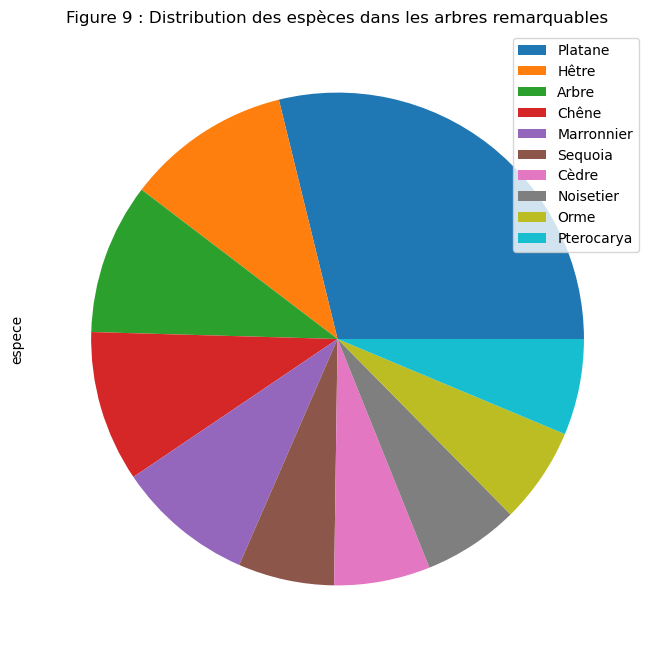

In [105]:
arbres_remarquables = arbres_viz[arbres_viz['remarquable']==1]
arbres_remarquables['espece'].value_counts().head(10).plot.pie(legend=True, labels=None, figsize=(8,8))
plt.title("Figure 9 : Distribution des espèces dans les arbres remarquables")

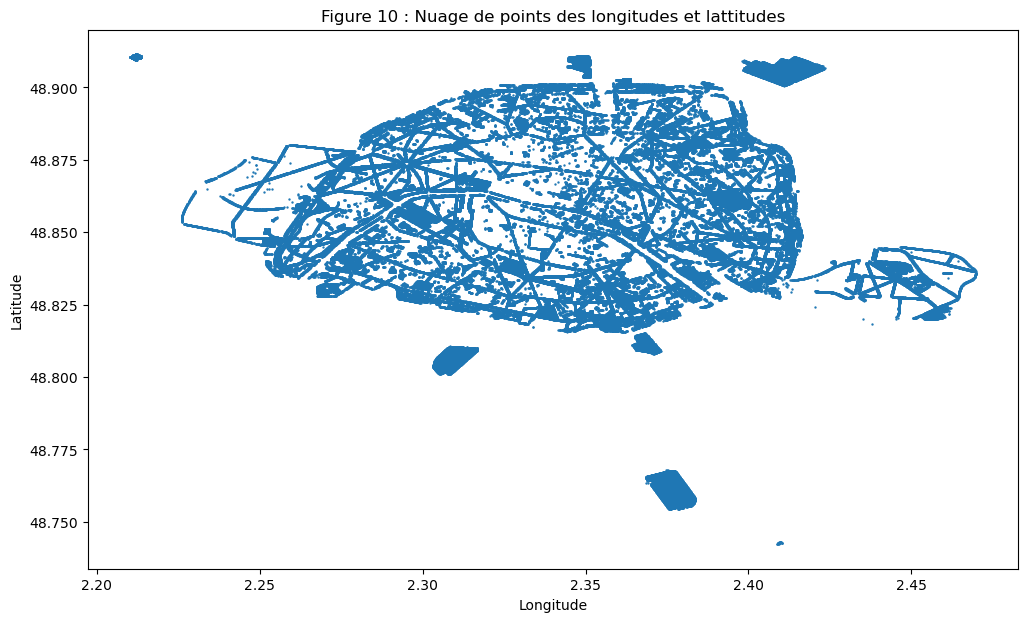

In [106]:
plt.figure(figsize=(12, 7))
plt.scatter(arbres_viz['longitude'], arbres_viz['latitude'], s=0.5)
plt.title("Figure 10 : Nuage de points des longitudes et lattitudes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Références

- [Source des données](https://opendata.paris.fr/explore/dataset/les-arbres)